In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [35]:
raw_file = pd.read_csv(r'/Users/mahidharreddy/Downloads/raw_eda_practice_data.csv')

In [36]:
raw_file

,Emp_ID,Name,Age,Experience,Department,Salary,Join_Date,Performance_Score,City
0,1051,Sneha,30.0,10,IT,60000,2019-07-15,NaN,Chennai
1,1092,Raj,32.0,2,Operations,80000,2021-03-20,5.0,Mumbai
2,1014,Amit,40.0,2,IT,90000,2019-07-15,NaN,Mumbai
3,1071,Amit,25.0,10,IT,NaN,2019-07-15,NaN,NaN
4,1060,Deepa,32.0,1,IT,90000,2019-07-15,4.0,Bangalore
...,...,...,...,...,...,...,...,...,...
150,1051,Sneha,30.0,10,IT,60000,2019-07-15,NaN,Chennai
151,1092,Raj,32.0,2,Operations,80000,2021-03-20,5.0,Mumbai
152,1014,Amit,40.0,2,IT,90000,2019-07-15,NaN,Mumbai
153,1071,Amit,25.0,10,IT,NaN,2019-07-15,NaN,NaN


In [37]:
raw_file.isnull().sum()

Emp_ID                0
Name                  0
Age                  18
Experience           19
Department           18
Salary               19
Join_Date            27
Performance_Score    38
City                 30
dtype: int64

In [38]:
raw_file['Age'] = pd.to_numeric(raw_file['Age'], errors='coerce')

In [39]:
raw_file['Age'][0:20]

0     30.0
1     32.0
2     40.0
3     25.0
4     32.0
5     30.0
6     25.0
7     32.0
8     40.0
9     32.0
10    40.0
11    30.0
12    40.0
13    25.0
14    30.0
15    25.0
16     NaN
17    28.0
18    40.0
19    28.0
Name: Age, dtype: float64

In [40]:
raw_file.isnull().sum()

Emp_ID                0
Name                  0
Age                  18
Experience           19
Department           18
Salary               19
Join_Date            27
Performance_Score    38
City                 30
dtype: int64

In [41]:
raw_file['Experience'] = pd.to_numeric(raw_file['Experience'], errors='coerce')

In [42]:
raw_file['Experience'][50:100]

50     NaN
51     1.0
52     2.0
53     2.0
54     1.0
55     NaN
56     2.0
57    10.0
58    10.0
59     1.0
60     NaN
61     NaN
62     1.0
63     NaN
64     NaN
65     NaN
66     NaN
67    10.0
68     NaN
69     NaN
70     NaN
71     5.0
72     2.0
73     NaN
74     NaN
75    10.0
76     1.0
77     NaN
78    10.0
79     5.0
80     NaN
81     NaN
82     1.0
83    10.0
84    10.0
85    10.0
86     5.0
87     NaN
88     5.0
89     2.0
90     2.0
91     NaN
92     NaN
93     5.0
94     1.0
95    10.0
96    10.0
97     NaN
98     NaN
99     2.0
Name: Experience, dtype: float64

In [43]:
raw_file['Department'] = raw_file['Department'].str.replace('\W','',regex=True)

In [44]:
raw_file['Department']

0              IT
1      Operations
2              IT
3              IT
4              IT
          ...    
150            IT
151    Operations
152            IT
153            IT
154            IT
Name: Department, Length: 155, dtype: object

In [45]:
raw_file['Salary'] = pd.to_numeric(raw_file['Salary'], errors='coerce')

In [46]:
raw_file['Salary']

0      60000.0
1      80000.0
2      90000.0
3          NaN
4      90000.0
        ...   
150    60000.0
151    80000.0
152    90000.0
153        NaN
154    90000.0
Name: Salary, Length: 155, dtype: float64

In [47]:
raw_file['Join_Date'] = raw_file['Join_Date'].str.replace('None','', regex=False)
raw_file['Join_Date'] = raw_file['Join_Date'].replace('', np.nan)

In [48]:
# Replace string 'None' / empty strings with NaN, then convert to numeric safely
raw_file['Performance_Score'] = raw_file['Performance_Score'].replace('None', np.nan)
raw_file['Performance_Score'] = raw_file['Performance_Score'].replace('', np.nan)
raw_file['Performance_Score'] = pd.to_numeric(raw_file['Performance_Score'], errors='coerce')

In [49]:
raw_file['City'] = raw_file['City'].str.replace('None','', regex=False)
raw_file['City'] = raw_file['City'].replace('', np.nan)

In [50]:
raw_file[20:60]

,Emp_ID,Name,Age,Experience,Department,Salary,Join_Date,Performance_Score,City
20,1001,Riya,28.0,5.0,HR,NaN,2021-03-20,4.0,Bangalore
21,1063,Deepa,40.0,10.0,Sales,50000.0,2019-07-15,NaN,Chennai
22,1059,Amit,30.0,NaN,IT,50000.0,2019-07-15,NaN,Chennai
23,1020,Amit,NaN,5.0,Operations,100000.0,2019-07-15,1.0,Mumbai
24,1032,Kunal,25.0,10.0,HR,NaN,2019-07-15,NaN,Bangalore
25,1075,Riya,32.0,NaN,Finance,NaN,2020-01-10,NaN,Bangalore
26,1057,Raj,25.0,NaN,HR,50000.0,2020-01-10,3.0,NaN
27,1021,Kunal,32.0,NaN,Finance,90000.0,2019-07-15,NaN,Chennai
28,1088,Riya,25.0,5.0,Sales,100000.0,2021-03-20,1.0,Bangalore
29,1048,Deepa,40.0,NaN,IT,100000.0,2018-05-01,2.0,Mumbai


In [51]:
emp = raw_file.copy()

In [52]:
emp.isnull().sum()

Emp_ID                0
Name                  0
Age                  18
Experience           61
Department           18
Salary               33
Join_Date            27
Performance_Score    38
City                 30
dtype: int64

In [53]:
# clean_data['Age'] = clean_data['Age'].fillna(np.mean(pd.to_numeric(clean_data['Age'])))
emp['Age'] = emp['Age'].fillna(np.mean(pd.to_numeric(emp['Age'])))

In [54]:
emp.isnull().sum()

Emp_ID                0
Name                  0
Age                   0
Experience           61
Department           18
Salary               33
Join_Date            27
Performance_Score    38
City                 30
dtype: int64

In [56]:
emp['Experience'] = emp['Experience'].fillna(np.mean(pd.to_numeric(emp['Experience'])))

In [57]:
emp.isnull().sum()

Emp_ID                0
Name                  0
Age                   0
Experience            0
Department           18
Salary               33
Join_Date            27
Performance_Score    38
City                 30
dtype: int64

In [58]:
emp['Salary'] = emp['Salary'].fillna(np.mean(pd.to_numeric(emp['Salary'])))

In [59]:
emp.isnull().sum()

Emp_ID                0
Name                  0
Age                   0
Experience            0
Department           18
Salary                0
Join_Date            27
Performance_Score    38
City                 30
dtype: int64

In [62]:
emp['Join_Date'] = emp['Join_Date'].fillna(emp['Join_Date'].mode()[0])


In [63]:
emp.isnull().sum()

Emp_ID                0
Name                  0
Age                   0
Experience            0
Department           18
Salary                0
Join_Date             0
Performance_Score    38
City                 30
dtype: int64

In [64]:
emp['Department'] = emp['Department'].fillna(emp['Department'].mode()[0])

In [65]:
emp.isnull().sum()

Emp_ID                0
Name                  0
Age                   0
Experience            0
Department            0
Salary                0
Join_Date             0
Performance_Score    38
City                 30
dtype: int64

In [66]:
emp['City'] = emp['City'].fillna(emp['City'].mode()[0])

In [67]:
emp.isnull().sum()

Emp_ID                0
Name                  0
Age                   0
Experience            0
Department            0
Salary                0
Join_Date             0
Performance_Score    38
City                  0
dtype: int64

In [68]:
emp['Performance_Score'] = emp['Performance_Score'].fillna(np.mean(pd.to_numeric(emp['Performance_Score'])))

In [69]:
emp.isnull().sum()

Emp_ID               0
Name                 0
Age                  0
Experience           0
Department           0
Salary               0
Join_Date            0
Performance_Score    0
City                 0
dtype: int64

In [80]:
import os
emp.to_csv(os.path.expanduser('~/clean.csv'))


In [81]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

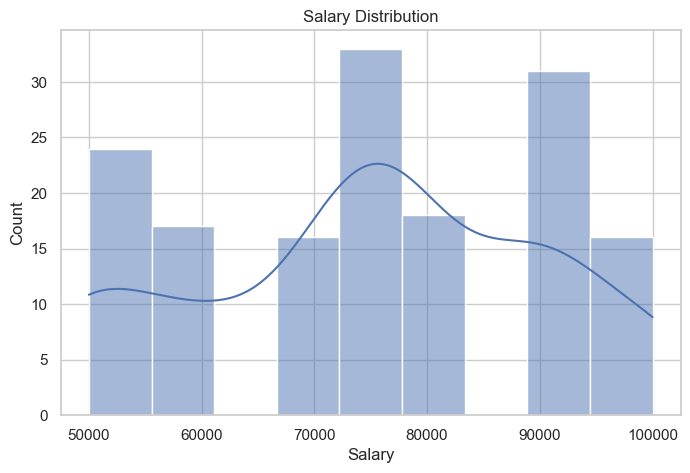

In [82]:
plt.figure(figsize=(8,5))
sns.histplot(emp['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()


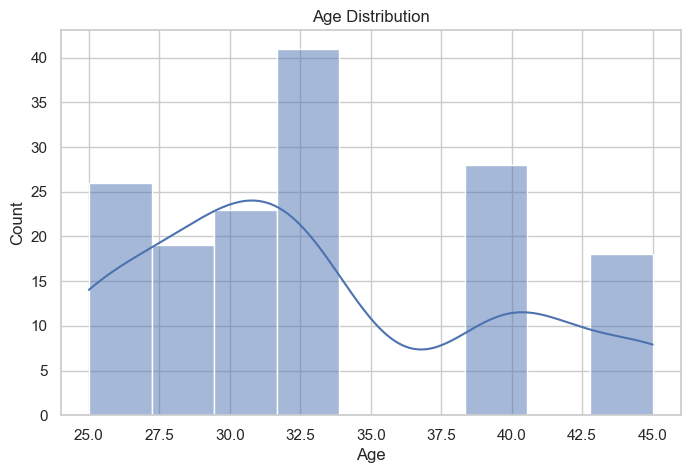

In [83]:
plt.figure(figsize=(8,5))
sns.histplot(emp['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


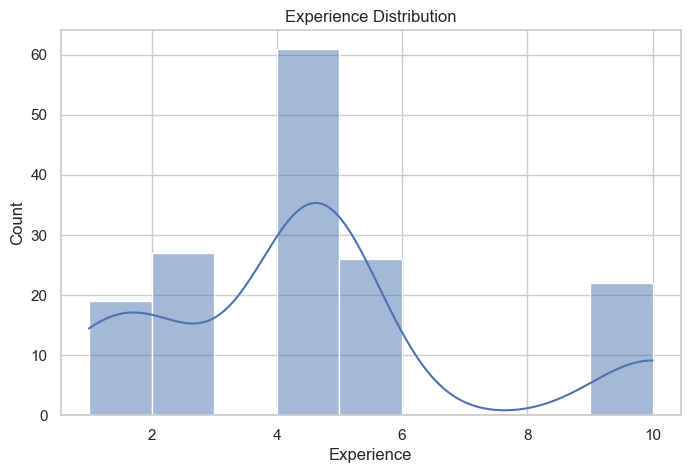

In [84]:
plt.figure(figsize=(8,5))
sns.histplot(emp['Experience'], kde=True)
plt.title("Experience Distribution")
plt.show()


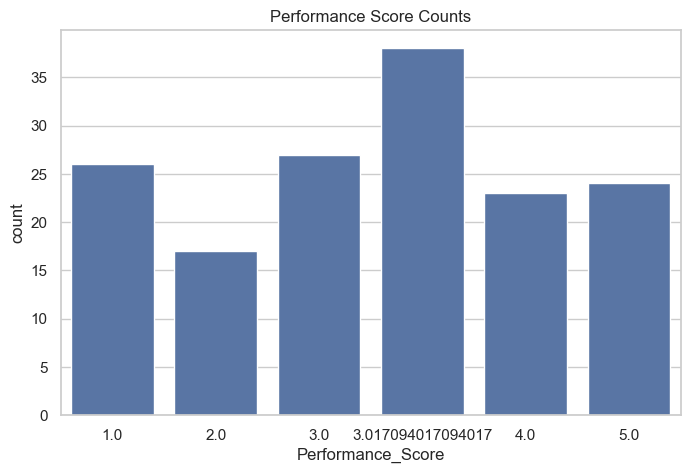

In [85]:
plt.figure(figsize=(8,5))
sns.countplot(x=emp['Performance_Score'])
plt.title("Performance Score Counts")
plt.show()


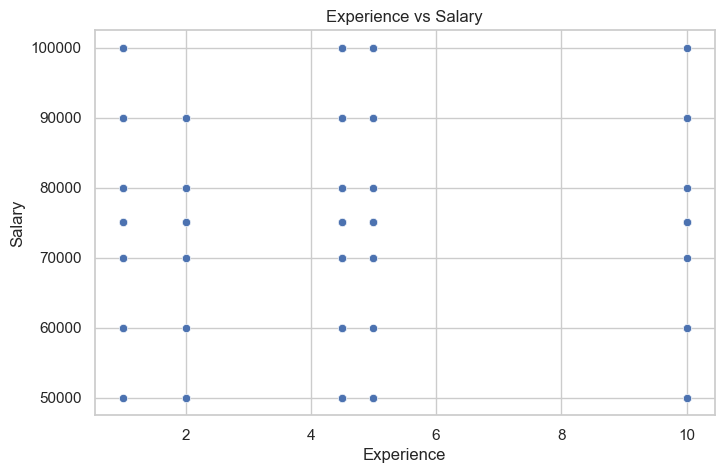

In [86]:
# Bi variate
plt.figure(figsize=(8,5))
sns.scatterplot(data=emp, x='Experience', y='Salary')
plt.title("Experience vs Salary")
plt.show()


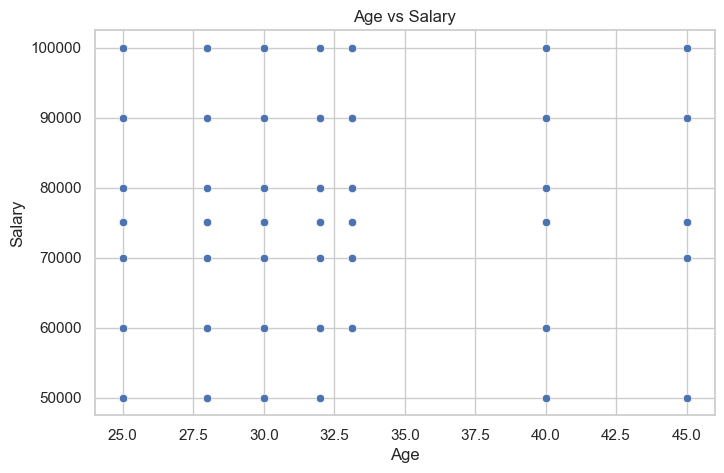

In [87]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=emp, x='Age', y='Salary')
plt.title("Age vs Salary")
plt.show()


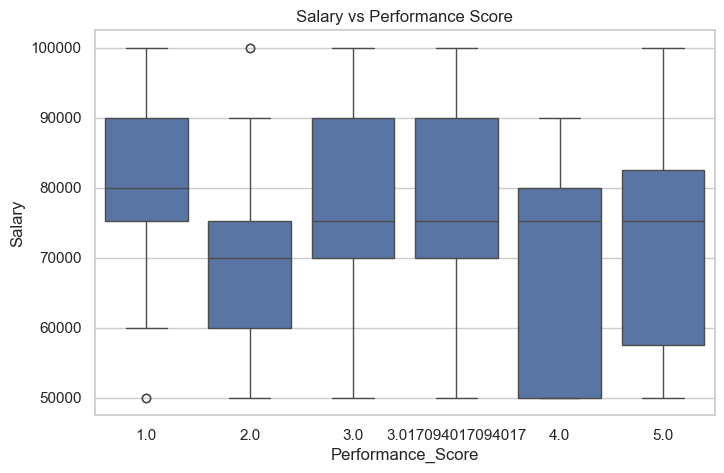

In [88]:
plt.figure(figsize=(8,5))
sns.boxplot(data=emp, x='Performance_Score', y='Salary')
plt.title("Salary vs Performance Score")
plt.show()


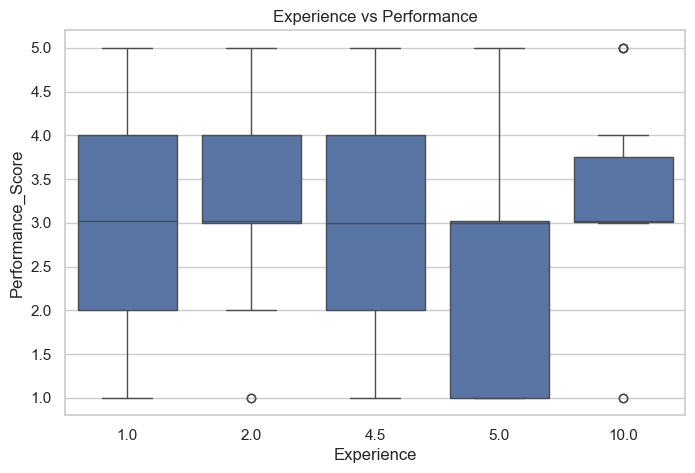

In [89]:
plt.figure(figsize=(8,5))
sns.boxplot(data=emp, x='Experience', y='Performance_Score')
plt.title("Experience vs Performance")
plt.show()


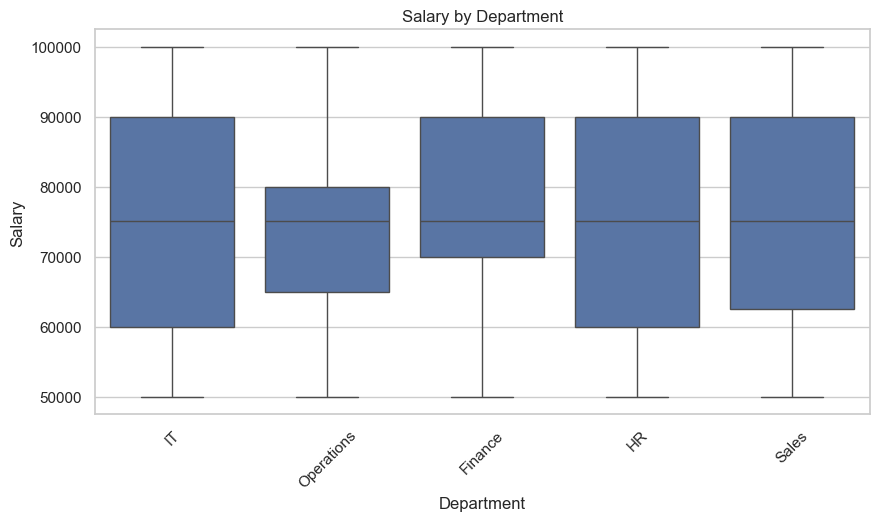

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(data=emp, x='Department', y='Salary')
plt.xticks(rotation=45)
plt.title("Salary by Department")
plt.show()


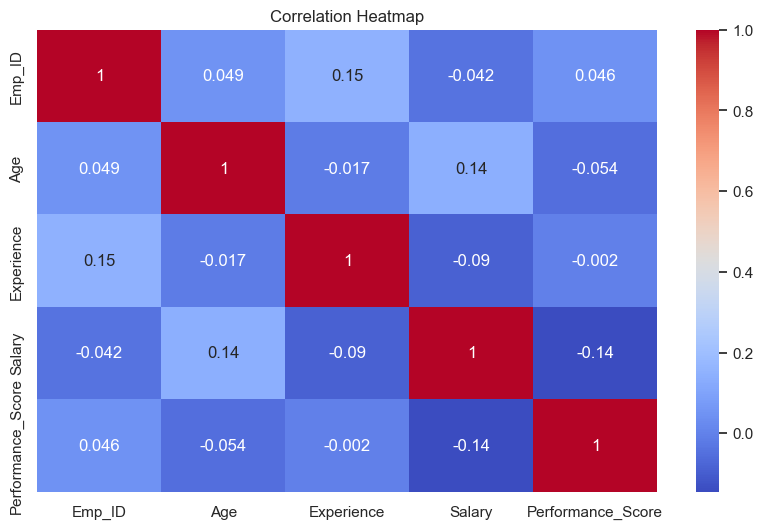

In [93]:
# MULTI VARIATE - heatmap for numeric features only
plt.figure(figsize=(10,6))
numeric_corr = emp.select_dtypes(include=[np.number]).corr()
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


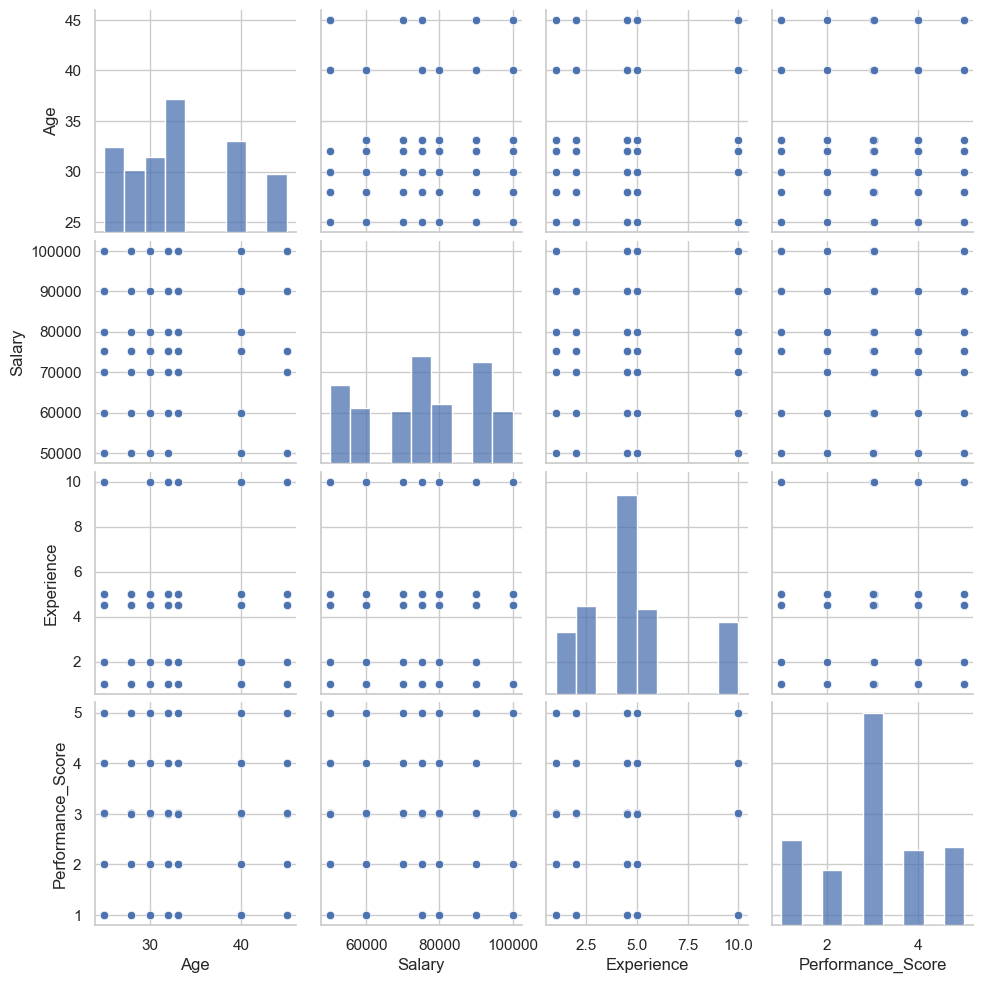

In [94]:
sns.pairplot(emp[['Age','Salary','Experience','Performance_Score']])
plt.show()


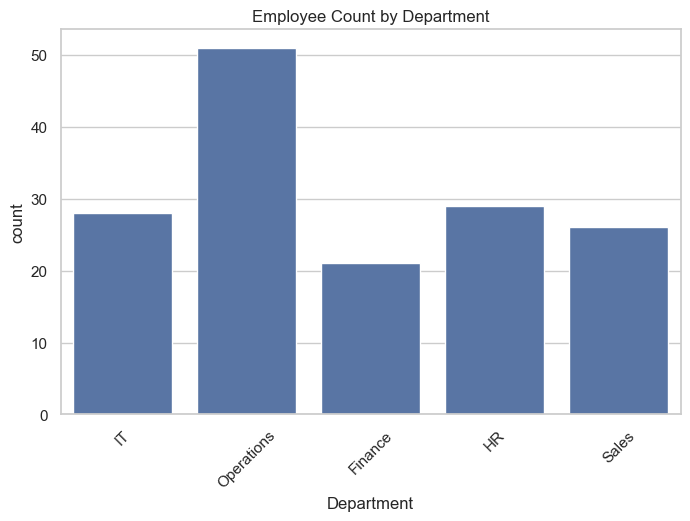

In [95]:
plt.figure(figsize=(8,5))
sns.countplot(data=emp, x='Department')
plt.xticks(rotation=45)
plt.title("Employee Count by Department")
plt.show()


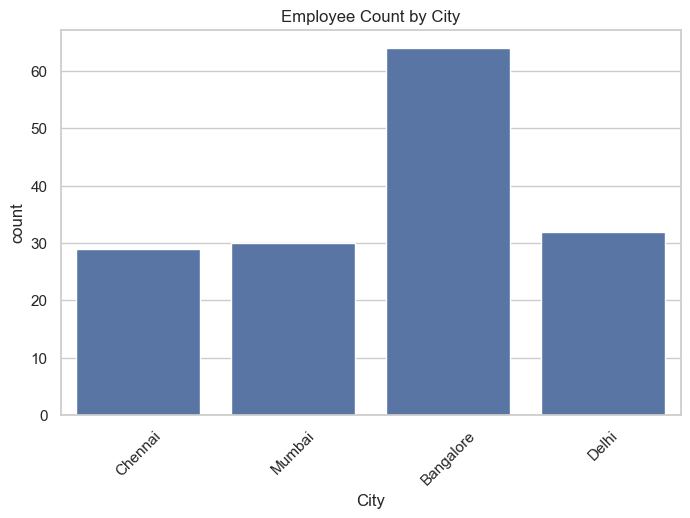

In [96]:
plt.figure(figsize=(8,5))
sns.countplot(data=emp, x='City')
plt.xticks(rotation=45)
plt.title("Employee Count by City")
plt.show()
